In [1]:
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%load_ext autoreload
%autoreload 2
import os
from environment.main import PacMan
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
import collections
from qlearning_tiancheng_wang.q_policy import q_policy
from qlearning_tiancheng_wang.train import train
from tool.save_load import save_q_table, load_q_table
from tqdm import tqdm
import numpy as np

In [2]:
# set charater policy
def policy(observation, setting):
    return (0,1)

In [3]:
import numpy as np
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
# game.blinky.set_policy(lambda **kwargs: np.array((0,-1)))
# game.inky.set_policy(lambda **kwargs: np.array((0,-1)))
# print(game.synthetic_array)
# game.random_reset()
game.setting.maximum_time = 40
score = 0

for i in range(10):
    game.random_reset()
    game.generate_animation()
    ani = HTML(game.animation.to_jshtml())
    s = game.process.reward
    print()
    print(s)
    score += s

print()
print('baseline average score:', score/10)
ani

Generated frames: 15
1500
Generated frames: 40
1778
Generated frames: 11
797
Generated frames: 29
4991
Generated frames: 28
4891
Generated frames: 40
768
Generated frames: 3
300
Generated frames: 29
4991
Generated frames: 15
1399
Generated frames: 13
1199

baseline average score: 2261.4


In [28]:
game = PacMan(maze_row_num=2, maze_column_num=2)

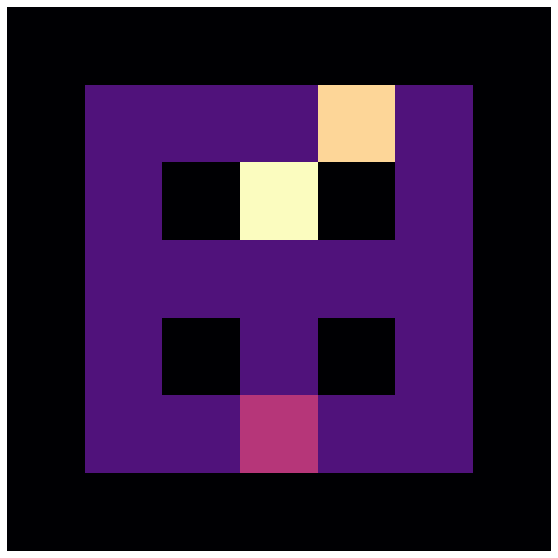

In [95]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.random_reset()
# game.agent.set_policy(lambda x, y: np.array((0,1)))
# game.blinky.set_policy(lambda **kwargs: np.array((0,-1)))
# game.inky.set_policy(lambda **kwargs: np.array((0,-1)))
game.setting.maximum_time = 500
game.graphic.frame_figure

20099
20198
20297
20295
20293
20291
20390
20489
20588
20687
20786
20885
20984
21083
21182
21281
21380
21479
21578
21677
21776
21774
21772
21770
1769
1767
1866
1864
2463


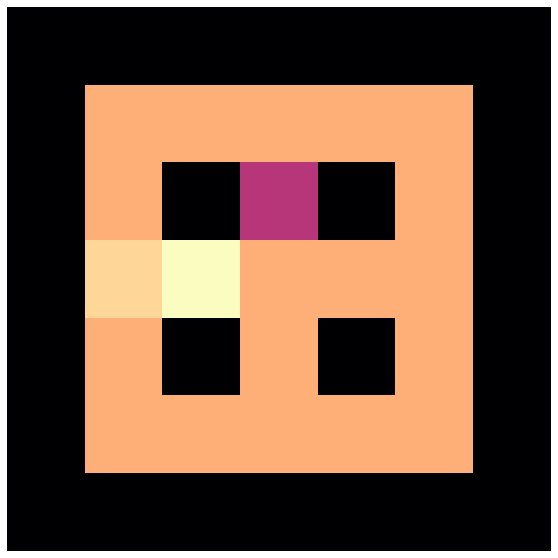

In [3478]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.setting.maximum_time = 500
game.random_reset()

while not game.process.termination:

    game.run_single_frame()
    print(game.process.reward+20000)
game.graphic.frame_figure

In [868]:
from wang_qlearning.q_state import calculate_state
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.setting.maximum_time = 500

{(4, 3), (3, 1), (5, 4), (5, 1), (2, 5), (1, 3), (4, 5), (3, 3), (5, 3), (1, 2), (2, 1), (1, 5), (3, 2), (3, 5), (5, 2), (5, 5), (1, 1), (1, 4), (2, 3)}
(-1, -1, -2, 2, -3, -3)


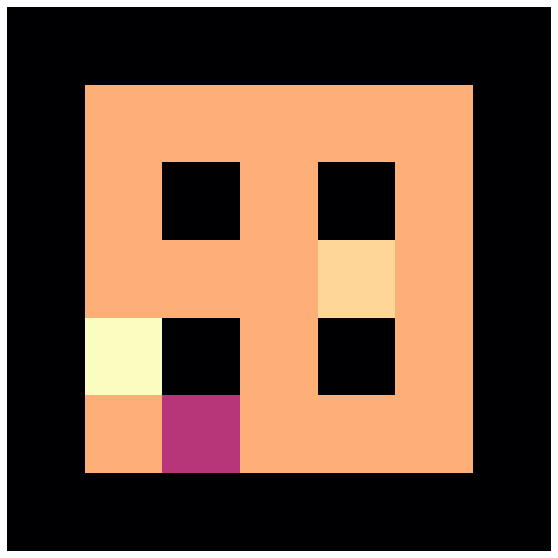

In [912]:
game.run_single_frame()
calculate_state(self_position=game.agent.position, common_observation=game.common_observation, setting=game.setting, synthetic_array=game.synthetic_array)
game.graphic.frame_figure

In [ ]:
game = PacMan(maze_row_num=3, maze_column_num=3, maze_row_height=2, maze_column_width=2)
game.random_reset()
# game.agent.set_policy(lambda x: np.array((0,1)))
# game.blinky.set_policy(lambda x: np.array((0,-1)))
# print(game.synthetic_array[1,:])
game.generate_animation()
# HTML(game.animation.to_jshtml())
HTML(game.animation.to_html5_video())

In [3]:
game = PacMan(maze_row_num=10, maze_column_num=5, maze_row_height=2, maze_column_width=2)
# game.agent.set_policy(policy)
game.random_reset()
# game.agent.set_policy(policy)
game.generate_animation()
HTML(game.animation.to_jshtml())

Generated frames: 50

In [1327]:
q_table = collections.defaultdict(int)

In [2]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

In [73]:
win = 0 
for i in range(100):
    game.random_reset()
    while not game.process.termination:
        game.run_one_step_without_graph()
    if game.process.win:
        win +=1
print(win)

24


In [6]:
print(game.process.win)

True


In [393]:
game = PacMan(maze_row_num=1, maze_column_num=2, maze_row_height=4, maze_column_width=2)

game.setting.maximum_time = 500

In [394]:
q_policy = Policy(random_mode=True)
game.agent.set_policy(q_policy)
game.agent.policy.q_table = q_table
game.is_training = True

In [395]:
game.agent.policy.random_mode

True

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:28<00:00,  2.09s/it]

47.0317


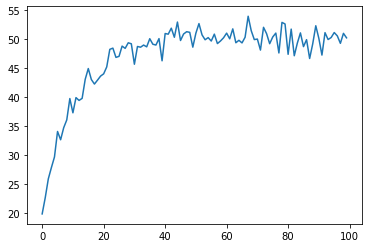

In [397]:
from tqdm import tqdm
rewards = []
for i in tqdm(range(0, 100)):
    batch = []
    for j in range(0,1000):
        reward = train(game, q_table)
        batch.append(reward)
        game.random_reset()
    rewards.append(np.mean(batch))
plt.plot(rewards)
import numpy as np
print(np.mean(rewards))

In [1314]:
print(len(q_table))

print(len([q_table[k] for k in q_table if q_table[k]==0])/len(q_table))

101824
0.3062637492143306


In [1310]:
print(len(q_table))

print(len([q_table[k] for k in q_table if q_table[k]==0])/len(q_table))

88960
0.3201551258992806


In [1345]:
game.random_reset()
game.agent.policy.random_mode=False
game.is_training = False
game.show_rewards=True
print(game.agent.policy.random_mode)
print(game.is_training)
game.generate_animation()
ani = HTML(game.animation.to_jshtml())
game.agent.policy.random_mode=True
game.show_rewards=False
print('\nreward:', game.process.reward)
# game.agent.policy.q_table
ani

False
False
Generated frames: 0
 rewards: 10
Generated frames: 1
 rewards: 10
Generated frames: 2
 rewards: -1
Generated frames: 3
 rewards: -5
Generated frames: 4
 rewards: -1
Generated frames: 5
 rewards: 10
Generated frames: 6
 rewards: -5
Generated frames: 7
 rewards: -5
Generated frames: 8
 rewards: 10
Generated frames: 9
 rewards: 10
Generated frames: 10
 rewards: -5
Generated frames: 11
 rewards: -5
Generated frames: 12
reward: 23


# divide
---

In [970]:
save_q_table(q_table, './qlearning_tiancheng_wang/trained_on_large_but_great_on_small.txt')

# divide
---

In [731]:
# len(q_table)
# q_table.keys()

In [2491]:
# q_table

In [2502]:
import json

with open(r'q_table.txt','w+') as f:
    f.write(str(q_table))

In [2583]:
save_q_table(q_table, './wang_qlearning/test.txt')
test = load_q_table(r'./wang_qlearning/test.txt')
test == q_table

True

In [3560]:
table = collections.defaultdict(int)

In [30]:
table = load_q_table(r'./qlearning_tiancheng_wang/hard_mode_table.txt')

In [31]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

game.setting.maximum_time = 40
q_policy = Policy()
game.agent.set_policy(q_policy)
game.agent.policy.q_table = table

In [8]:
game.is_training

False

In [3645]:
for i in range(20000):
    game.random_reset()
    train(game, table)

In [3646]:
len(table)
# print(game.is_training)

161708

In [3647]:
tmp = [(k,v) for k, v in table.items() if v == 0]
print(len(tmp))

24394


In [32]:
game.agent.policy.random_mode

False

In [34]:
score = 0
print(game.agent.policy.random_mode, game.is_training)
for i in range(10):
    game.random_reset()
    game.generate_animation()
    ani = HTML(game.animation.to_jshtml())
    s = game.process.reward
    print()
    print(s)
    score += s

print('\n average reward:', score/10)
ani

False False
Generated frames: 2
6
Generated frames: 15
35
Generated frames: 12
31
Generated frames: 17
42
Generated frames: 1
3
Generated frames: 17
45
Generated frames: 2
6
Generated frames: 11
30
Generated frames: 21
54
Generated frames: 11
27

 average reward: 27.9


In [3650]:
game.agent.policy.q_table == table


True

In [3651]:
# save_q_table(table, './wang_qlearning/hard_mode_table.txt')
test = load_q_table(r'./wang_qlearning/hard_mode_table.txt')
# test == table

True

# mark

In [458]:
q_table = collections.defaultdict(lambda :1)

In [459]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)

game.setting.maximum_time = 500

In [481]:
q_policy = Policy(random_mode=True)
game.agent.set_policy(q_policy)
game.agent.policy.q_table = q_table
print(game.agent.policy.random_mode)

True


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:23<00:00,  1.43s/it]

-8.61207


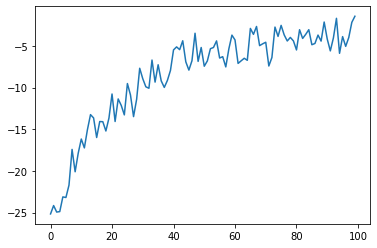

In [485]:
from tqdm import tqdm
rewards = []
for i in tqdm(range(0, 100)):
    batch = []
    for j in range(0,1000):
        reward = train(game)
        batch.append(reward)
        game.random_reset()
    rewards.append(np.mean(batch))
plt.plot(rewards)
import numpy as np
print(np.mean(rewards))

In [445]:
print(len(q_table))

print(len([q_table[k] for k in q_table if q_table[k]==0])/len(q_table))

171408
0.0


In [446]:
print(len(q_table))

print(len([q_table[k] for k in q_table if q_table[k]==0])/len(q_table))

171408
0.0


In [399]:
# q_table

In [449]:
game.random_reset()
game.agent.policy.random_mode=False
game.is_training = False
game.show_rewards=True
print(game.agent.policy.random_mode)
print(game.is_training)
game.generate_animation()
ani = HTML(game.animation.to_jshtml())
game.agent.policy.random_mode=True
game.show_rewards=False
print('\nreward:', game.process.reward)
# game.agent.policy.q_table
ani

False
False
Generated frames: 0
 rewards: 10
Generated frames: 1
 rewards: 10
Generated frames: 2
 rewards: 10
Generated frames: 3
 rewards: 10
Generated frames: 4
 rewards: -1
Generated frames: 5
 rewards: -1
Generated frames: 6
 rewards: -20
Generated frames: 7
reward: 18


In [457]:
win = 0
for i in range(100):
    game.random_reset()
    while not game.process.termination:
#         print(game.agent.policy.state)
        game.run_one_step_without_graph()
    if game.process.win:
        win+=1
print(win)

0


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [09:05<00:00, 91.69it/s]


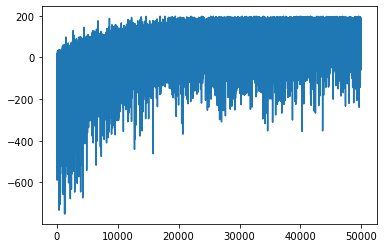

In [211]:
from qlearning_tiancheng_wang.q_state import calculate_state
from qlearning_tiancheng_wang.q_policy import q_policy
from numpy.random import default_rng
rng = default_rng(1)
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
q_table = collections.defaultdict(lambda :1)
game.setting.maximum_time = 200
rewards = []
for episode in tqdm(range(50000)):
    game.random_reset()
    while not game.process.termination:
        s = game.state()
        dice = rng.random()
        if dice < 0.05:
            a = tuple(rng.choice([(0, 1), (1, 0), (-1, 0), (0, -1)]))
        else:
            a = q_policy(s, q_table)
        game.run_one_step_without_graph(instruction=a)
        r = game.process.current_reward
#         print(r)
        ns = game.state()
        max_value = max([q_table[ns, a] for act in [(0, 1), (1, 0), (-1, 0), (0, -1)]])
        ori = q_table[s,a]
        q_table[s, a] = ori + 0.05 * (r + 0.99 * max_value - ori)
    rewards.append(game.process.reward)
plt.plot(rewards)
plt.show()
#print(game.process.reward)
# game.graphic.frame_figure

In [72]:
len(q_table)

266992

In [38]:
# q_table
# np.concatenate(np.array(1), np.array([1,2]))
# a = np.array([1,2])
# b= np.array(1)
# np.concatenate((b,a))

In [219]:
win = 0
for episode in tqdm(range(1000)):
    game.random_reset()
    while not game.process.termination:
        s = game.state()
        a = q_policy(s, q_table)
        game.run_one_step_without_graph(instruction=a)
#     print(game.process.reward)
    if game.process.win:
        win+=1
print(win)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.21it/s]

612


In [221]:
import functools

In [222]:
ani_policy = functools.partial(q_policy, table=q_table)

In [223]:
game.agent.policy = ani_policy

In [224]:
game.generate_animation()

In [225]:
from IPython.display import HTML
game.random_reset()
game.generate_animation()
ani = HTML(game.animation.to_jshtml())
ani

Generated frames: 48

In [132]:
game = PacMan(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.generate_animation()
ani = HTML(game.animation.to_jshtml())
ani

Generated frames: 2

[autoreload of environment.main failed: Traceback (most recent call last):
  File "D:\conda-envs\707\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "D:\conda-envs\707\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "D:\conda-envs\707\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "D:\conda-envs\707\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 790, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "D:\coursework\707\coursework-707\environment\main.py", line 10, in <module>
    from policy.baseline import agent_policy, blinky_policy, random_policy, blinky_policy_random, inky_policy
ImportError: cannot import name 'blinky_

Generated frames: 50